In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading dataset from CSV file
df = pd.read_csv("FIFA23_official_data (1).csv")

In [3]:
# Creating copy of DataFrame
df_copy = df

In [4]:
# Displaying the first few rows of the DataFrame
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB",1-Jul-18,NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM",30-Jan-20,NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB",14-Sep-20,NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM",30-Aug-15,NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM",1-Sep-20,NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

In [6]:

df.shape

(17660, 29)

In [7]:
# checking null values

df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64

In [8]:
## checking the percentage of missing values

percentage_nan_club = df['Club'].isna().mean() * 100

In [9]:
## Filling Nan Values in Column Club with mode value
club_mode_value = df['Club'].mode()[0]
df['Club'] = df['Club'].fillna(club_mode_value)

In [10]:
## checking the percentage of missing values
percentage_nan_bodytype = df['Body Type'].isna().mean() * 100

In [11]:
bodytype_mode_value = df['Body Type'].mode()[0]
df['Body Type'] = df['Body Type'].fillna(bodytype_mode_value)

In [12]:
# real face column doesnt have importance in analysis so it cna be dropped

df.drop(columns='Real Face',inplace=True)

In [13]:
df['Position'].isna().mean()*100

np.float64(0.19818799546998866)

In [14]:
position_mode_value = df['Position'].mode()[0] 
df['Position'] = df['Position'].fillna(position_mode_value)

In [15]:
df['Joined'] = pd.to_datetime(df['Joined'],errors='coerce')

joined_median = df['Joined'].median()
df['Joined'] = df['Joined'].fillna(joined_median)

C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\4048745774.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Joined'] = pd.to_datetime(df['Joined'],errors='coerce')


In [16]:

## Loaned From column has 96% NAN Values so the column doesn't have much significane in dataset so it can be dropped

df['Loaned From'].isna().mean() * 100
df.drop(columns='Loaned From',inplace=True)

df['Best Overall Rating'].isna().mean() * 100
df.drop(columns=['Best Overall Rating'],inplace=True)

In [17]:
df['Kit Number'].skew()

np.float64(1.6647493545041097)

In [18]:
df['Kit Number'].fillna(df['Kit Number'].median(),inplace=True)

C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\3596446132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kit Number'].fillna(df['Kit Number'].median(),inplace=True)


In [ ]:

df['Release Clause'].value_counts

<bound method IndexOpsMixin.value_counts of 0          €157M
1          €155M
2         €97.7M
3        €198.9M
4        €154.4M
          ...   
17655      €218K
17656      €188K
17657      €142K
17658      €214K
17659      €131K
Name: Release Clause, Length: 17660, dtype: object>

In [ ]:

def convert_releaseclause(value):

    if pd.isna(value):

        return np.nan

    value = str(value).replace('€','').strip()

    if 'M' in value:
         return (float(value.replace('M',''))*1000000)

    if 'K' in value:
         return (float(value.replace('K',''))*1000)

    else:
        return (float(value))

df['Release Clause'] = df['Release Clause'].apply(convert_releaseclause)

In [ ]:
release_clause_mean = df['Release Clause'].mean()
df['Release Clause'] = df['Release Clause'].fillna(release_clause_mean).round().astype('Int64')

In [22]:

df['Contract Valid Until'].values

array(['2026', '2026', '2024', ..., '2023', '2021', '2021'],
      shape=(17660,), dtype=object)

In [ ]:
# Contract Valid Until column has values of different formats so convert them into single format
df['parsed_date'] = pd.to_datetime(df['Contract Valid Until'], errors='coerce', dayfirst=True)

mask = df['parsed_date'].isna()
df.loc[mask, 'parsed_date'] = pd.to_datetime(

    df.loc[mask, 'Contract Valid Until'].astype(str) + '-01-01',

    errors='coerce'

)

df['parsed_date'] = pd.to_datetime(df['parsed_date'], errors='coerce')

df['Contract Valid Until'] = df['parsed_date'].dt.year

most_common_year = int(df['Contract Valid Until'].mode()[0])
df['Contract Valid Until'] = df['Contract Valid Until'].fillna(most_common_year).astype('Int64')

df.drop(columns='parsed_date', inplace=True)

C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\4082294086.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[mask, 'parsed_date'] = pd.to_datetime(
C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\4082294086.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<DatetimeArray>
['2023-06-30 01:00:00-01:00', '2023-06-30 01:00:00-01:00',
 '2023-06-30 01:00:00-01:00',                       'NaT',
 '2023-06-30 01:00:00-01:00', '2023-06-30 01:00:00-01:00',
                       'NaT',                       'NaT',
                       'NaT',                       'NaT',
 ...
                       'NaT', '2023-06-30 01:00:00-01:00',
 '2023-06-30 01:00:00-01:00', '2018-06-30 01:00:00-01:00',
 '2023-06-30 01:00:00-01:00', '2023-06-30 01:00:00-01:00',
 '2023-06-30

### Conclusion: 

#### Club has 1% of missing values so i filled NA values with mode value
#### Body Type has 0.25% midding values so used mode value
#### Loaned From and Best Iver all rating has 95% missing values so dropeed the columns as they are not significant

In [24]:

df.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
Kit Number                  0
dtype: int64

In [25]:

df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,3,High/ Medium,Unique,"<span class=""pos pos28"">SUB",2018-07-01,2026,189cm,82kg,157000000,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,4,High/ High,Unique,"<span class=""pos pos15"">LCM",2020-01-30,2026,179cm,69kg,155000000,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,3,High/ High,Stocky (170-185),"<span class=""pos pos7"">LB",2020-09-14,2024,172cm,69kg,97700000,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,4,High/ High,Unique,"<span class=""pos pos13"">RCM",2015-08-30,2025,181cm,70kg,198900000,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,3,High/ High,Normal (170-),"<span class=""pos pos13"">RCM",2020-09-01,2026,172cm,68kg,154400000,23.0


In [ ]:
## Deleting unwnated columns

df.drop(columns=['Photo','Flag','Club Logo'],inplace=True)

In [ ]:
# Removing HTML Tags from the data and extracting only Position
df['Position'] = df['Position'].str.extract(r'>(\w+)$')

In [ ]:

def convert_wage(value):
    
    value = str(value).replace('€','').strip()

    if 'M' in value:
          return int(float(value.replace('M','')) * 1000000)

    if 'K' in value:
         return int(float(value.replace('K','')) * 1000)

    else:
        return int(value)

df['Wage'] = df['Wage'].apply(convert_wage)

In [ ]:

def convert_value(value):

    value = str(value).replace('€','').strip()

    if 'M' in value:
        return int(float(value.replace('M',''))* 1000000)

    if 'K' in value:
        return int(float(value.replace('K',''))*1000)

    else:
        return int(value)

df['Value'] = df['Value'].apply(convert_value)

In [30]:

df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause', 'Kit Number'],
      dtype='object')

In [ ]:

# Dictionary mapping short forms to full names

position_map = {

    'SUB': 'Substitute',

    'LCM': 'Left Central Midfielder',

    'LB': 'Left Back',

    'RCM': 'Right Central Midfielder',

    'RDM': 'Right Defensive Midfielder',

    'LCB': 'Left Center Back',

    'RS': 'Right Striker',

    'RB': 'Right Back',

    'LM': 'Left Midfielder',

    'LS': 'Left Striker',

    'RWB': 'Right Wing Back',

    'CDM': 'Central Defensive Midfielder',

    'RW': 'Right Winger',

    'RM': 'Right Midfielder',

    'LF': 'Left Forward',

    'LWB': 'Left Wing Back',

    'ST': 'Striker',

    'CAM': 'Central Attacking Midfielder',

    'LDM': 'Left Defensive Midfielder',

    'RES': 'Reserve',

    'LW': 'Left Winger',

    'CF': 'Center Forward',

    'RF': 'Right Forward',

    'RCB': 'Right Center Back',

    'CM': 'Central Midfielder',

    'CB': 'Center Back',

    'RAM': 'Right Attacking Midfielder',

    'LAM': 'Left Attacking Midfielder',

    'GK': 'Goalkeeper'

}


df['Position'] = df['Position'].replace(position_map)

In [32]:

df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,Germany,87,88,FC Bayern München,91000000,115000,2312,...,3,High/ Medium,Unique,Substitute,2018-07-01,2026,189cm,82kg,157000000,8.0
1,212198,Bruno Fernandes,27,Portugal,86,87,Manchester United,78500000,190000,2305,...,4,High/ High,Unique,Left Central Midfielder,2020-01-30,2026,179cm,69kg,155000000,8.0
2,224334,M. Acuña,30,Argentina,85,85,Sevilla FC,46500000,46000,2303,...,3,High/ High,Stocky (170-185),Left Back,2020-09-14,2024,172cm,69kg,97700000,19.0
3,192985,K. De Bruyne,31,Belgium,91,91,Manchester City,107500000,350000,2303,...,4,High/ High,Unique,Right Central Midfielder,2015-08-30,2025,181cm,70kg,198900000,17.0
4,224232,N. Barella,25,Italy,86,89,Inter,89500000,110000,2296,...,3,High/ High,Normal (170-),Right Central Midfielder,2020-09-01,2026,172cm,68kg,154400000,23.0


In [33]:

df.shape

(17660, 23)

In [ ]:

def age_groups(value):

    if 17 <= value <= 22:
         return "Young"
    elif 23 <= value <= 30:
        return "Adult"
    else:
        return "Senior"



df["Age Groups"] = df["Age"].apply(age_groups)

In [35]:

df.to_csv("FIFA 23 Cleaned.csv")

### Insights

### Who are the top 10 most valuable players (based on Value(€))

C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\1028492358.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Value',y='Name',data=top_10_players,palette=colors)


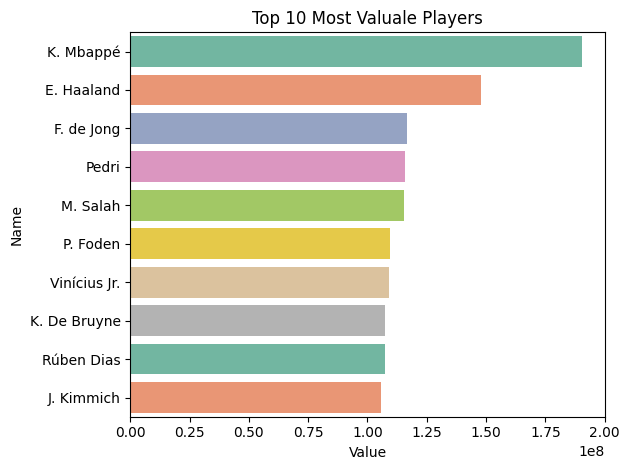

In [ ]:

colors =sns.color_palette("Set2",10)


# Sorting the data based on a specific column
top_10_players = df.sort_values('Value',ascending=False).head(10)
plot = sns.barplot(x='Value',y='Name',data=top_10_players,palette=colors)
plt.title("Top 10 Most Valuale Players")

plt.tight_layout()
plt.show()

### correlation between age and player overall rating

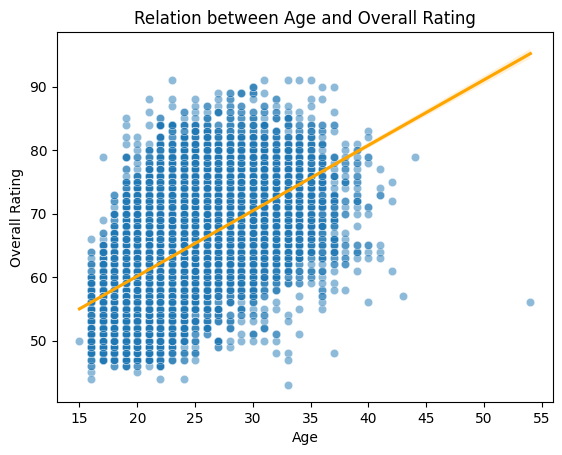

In [ ]:
sns.scatterplot(x='Age',y='Overall',data=df,alpha=0.5)
sns.regplot(x='Age',y='Overall',data=df,scatter=False,color='orange')

plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Relation between Age and Overall Rating')

plt.show()

C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\2263876660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Wage', data=top10, palette='viridis')


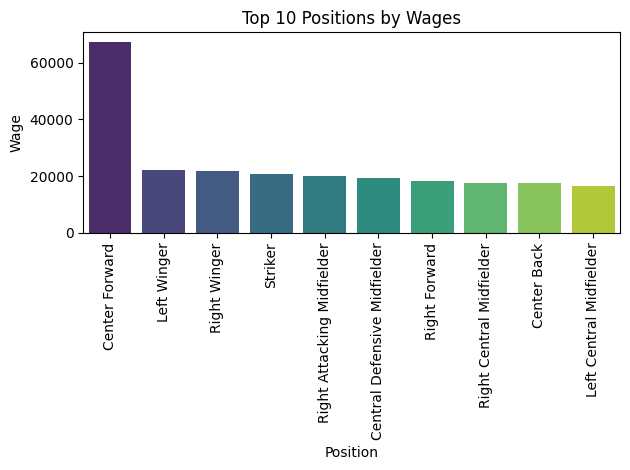

In [43]:
pos_avg = df.groupby('Position')['Wage'].mean().sort_values(ascending=False)

top10 = pos_avg.head(10).reset_index()

sns.barplot(x='Position', y='Wage', data=top10, palette='viridis')

plt.title("Top 10 Positions by Wages")
plt.xlabel("Position")
plt.ylabel("Wage")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 Club by Values')

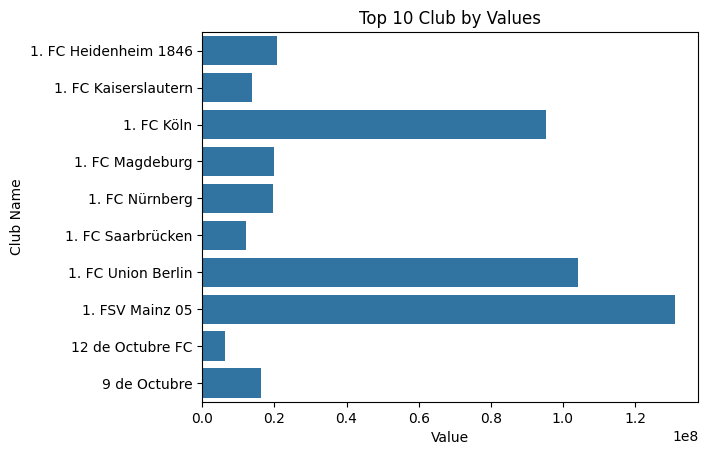

In [ ]:
club_values = df.groupby('Club')['Value'].sum().head(10).reset_index()
sns.barplot(x='Value',y='Club',data=club_values)

plt.xlabel("Value")
plt.ylabel("Club Name")

plt.title("Top 10 Club by Values")

C:\Users\Rushi\AppData\Local\Temp\ipykernel_9020\4222181527.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player Count', y='Body Type', data=body_counts, palette='Set2')


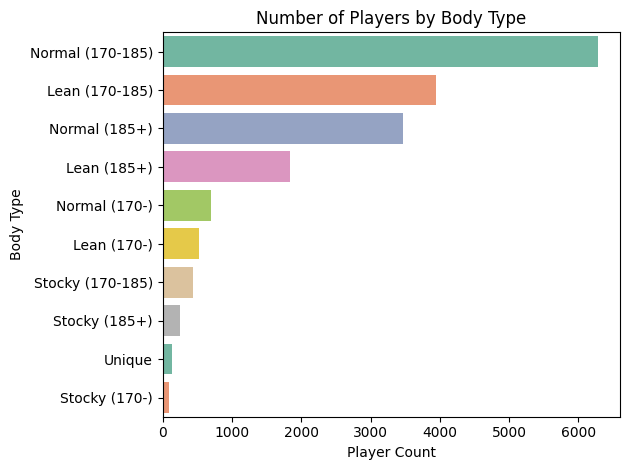

In [ ]:
body_counts = df['Body Type'].value_counts().reset_index()

body_counts.columns = ['Body Type', 'Player Count']

sns.barplot(x='Player Count', y='Body Type', data=body_counts, palette='Set2')

plt.title("Number of Players by Body Type")
plt.xlabel("Player Count")
plt.ylabel("Body Type")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Potential by Age Groups')

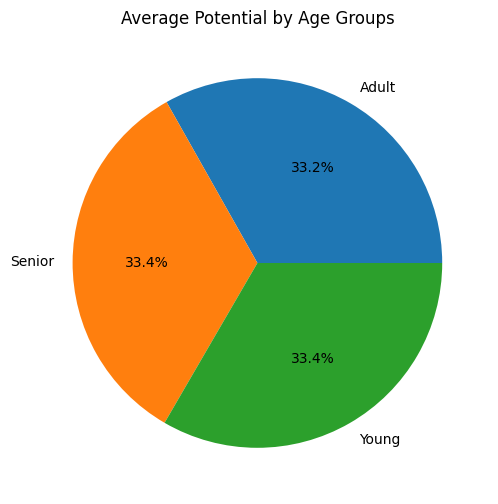

In [ ]:

value_age_groups = df.groupby("Age Groups")["Potential"].mean()

plt.figure(figsize=(15,6))
plt.pie(value_age_groups,labels=value_age_groups.index,autopct="%1.1f%%")

plt.title("Average Potential by Age Groups")

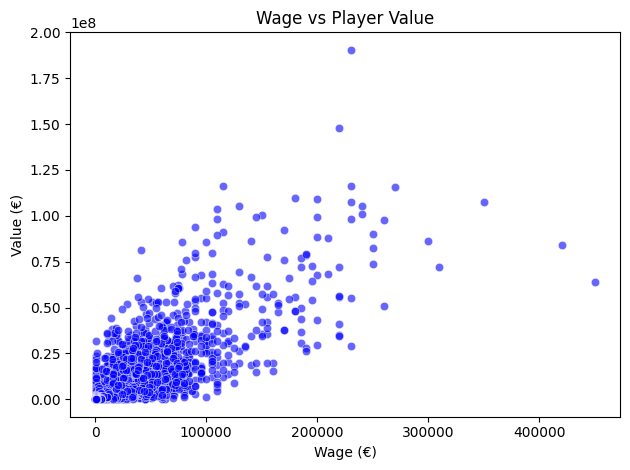

In [ ]:
sns.scatterplot(x='Wage', y='Value', data=df, color='blue', alpha=0.6)
plt.title('Wage vs Player Value')
plt.xlabel('Wage (€)')
plt.ylabel('Value (€)')
plt.tight_layout()

plt.show()